In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df = pd.read_excel(r"C:\Users\dell\Downloads\P6-SuperStoreUS-2015 (1).xlsx").ffill()

In [126]:
df.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,NetUnitPrice,Customer ID,Customer Name,Ship Mode,Customer Segment,...,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,NetAmount,NetProfit,Loss,Profit.1
0,20847,High,0.01,2.84,0.93,3.7416,3,Bonnie Potter,Express Air,Corporate,...,2015-01-07,2015-01-08,4.5600,4,13.01,88522,23.048256,18.2400,0.0000,18.240
1,20228,Not Specified,0.02,500.98,26.00,516.9604,5,Ronnie Proctor,Delivery Truck,Home Office,...,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,9925.639680,52684.3980,0.0000,52684.398
2,21776,Critical,0.06,9.48,7.29,16.2012,11,Marcus Dunlap,Regular Air,Home Office,...,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,516.818280,-1183.8112,-1183.8112,0.000
3,24844,Medium,0.09,78.69,19.99,91.5979,14,Gwendolyn F Tyson,Regular Air,Small Business,...,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2095.759952,12855.5280,0.0000,12855.528


In [127]:
df2 = df

In [128]:
df.shape

(1952, 31)

In [129]:
import seaborn as sns

C:\Users\dell\AppData\Local\Temp\ipykernel_15408\2715627328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Unit Price"])


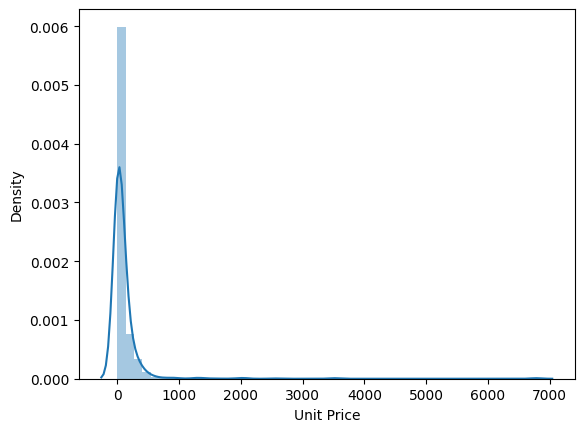

In [130]:
sns.distplot(df["Unit Price"])
plt.show()

In [131]:
df.shape

(1952, 31)

<Axes: xlabel='Unit Price'>

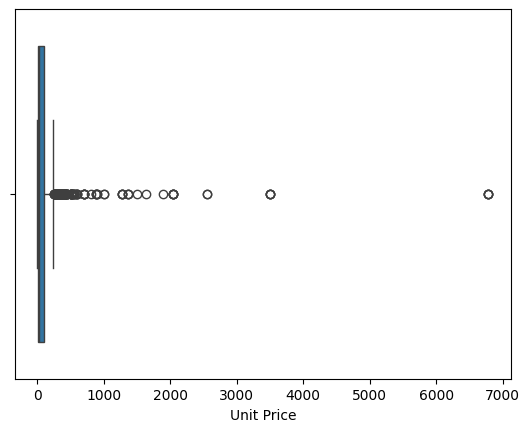

In [132]:
sns.boxplot(x= "Unit Price",data = df)

In [133]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
NetUnitPrice            0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
SellUnitPrice           0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
NetAmount               0
NetProfit               0
Loss                    0
Profit.1                0
dtype: int64

In [134]:
Q1 = df["Unit Price"].quantile(0.25)
Q3 = df["Unit Price"].quantile(0.75)
IQR = Q3-Q1
min_range = Q1-(1.5*IQR)
max_range = Q3+(1.5*IQR)
min_range,max_range

(np.float64(-135.255), np.float64(242.70499999999998))

In [135]:
df.shape

(1952, 31)

In [136]:
df = df[df["Unit Price"]<max_range]

In [137]:
df.shape

(1776, 31)

C:\Users\dell\AppData\Local\Temp\ipykernel_15408\2715627328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Unit Price"])


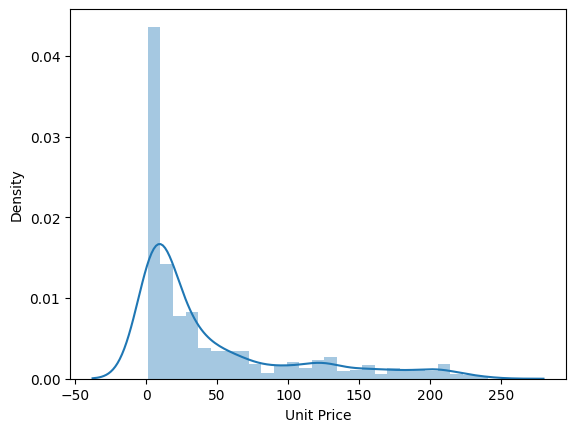

In [138]:
sns.distplot(df["Unit Price"])
plt.show()

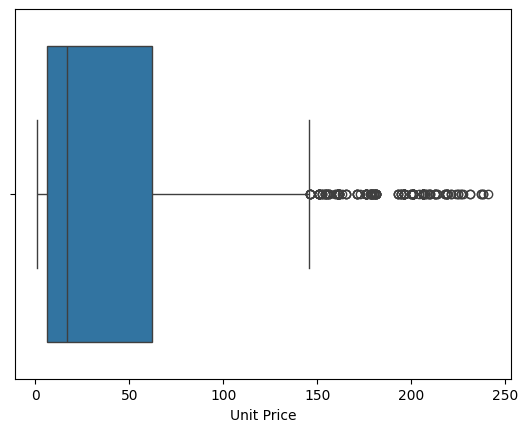

In [139]:
sns.boxplot(x="Unit Price" , data=df)
plt.show()

In [140]:
df2["z_score"]= (df2["Unit Price"] - df2["Unit Price"].mean())/df2["Unit Price"].std()

In [141]:
df2 = df2[df2["z_score"]<3]

In [142]:
df2.shape

(1931, 32)

In [143]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,NetUnitPrice,Customer ID,Customer Name,Ship Mode,Customer Segment,...,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,NetAmount,NetProfit,Loss,Profit.1
0,20847,High,0.01,2.84,0.93,3.7416,3,Bonnie Potter,Express Air,Corporate,...,2015-01-07,2015-01-08,4.5600,4,13.01,88522,23.048256,18.2400,0.0000,18.240
2,21776,Critical,0.06,9.48,7.29,16.2012,11,Marcus Dunlap,Regular Air,Home Office,...,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,516.818280,-1183.8112,-1183.8112,0.000
3,24844,Medium,0.09,78.69,19.99,91.5979,14,Gwendolyn F Tyson,Regular Air,Small Business,...,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2095.759952,12855.5280,0.0000,12855.528
4,24846,Medium,0.08,3.28,2.31,5.3276,14,Gwendolyn F Tyson,Regular Air,Small Business,...,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,58.177392,-168.2100,-168.2100,0.000
5,24847,Medium,0.05,3.28,4.20,7.3160,14,Gwendolyn F Tyson,Regular Air,Small Business,...,2015-05-12,2015-05-13,-37.0300,4,13.99,86838,45.651840,-148.1200,-148.1200,0.000
